In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing_raw = pd.read_csv(
    "housing_data.csv",
    parse_dates=["period_begin", "period_end"],
    dtype={"total_homes_sold": "Int32", "region_name": "category"}
)

In [3]:
housing_raw.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
0,"Appling County, GA",2020-04-27,2020-07-19,<NA>,1.0,1.0,222.7,136195.8,NaN
1,"Tooele County, UT",2018-08-27,2018-11-18,325,NaN,NaN,NaN,NaN,NaN
2,"Johnson County, TX",2019-09-23,2019-12-15,577,717.0,778.0,63.0,268737.6,17.095583
3,"Holmes County, OH",2017-10-09,2017-12-31,22,52.0,54.0,109.4,115308.3,34.050000
4,"Madison County, FL",2017-01-09,2017-04-02,12,54.0,55.0,151.2,158062.5,38.300000


In [4]:
housing_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622339 entries, 0 to 622338
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   region_name               622339 non-null  category      
 1   period_begin              622339 non-null  datetime64[ns]
 2   period_end                622339 non-null  datetime64[ns]
 3   total_homes_sold          567839 non-null  Int32         
 4   inventory                 616247 non-null  float64       
 5   active_listings           616905 non-null  float64       
 6   age_of_inventory          616247 non-null  float64       
 7   median_active_list_price  616513 non-null  float64       
 8   months_of_supply          561319 non-null  float64       
dtypes: Int32(1), category(1), datetime64[ns](2), float64(5)
memory usage: 37.5 MB


In [5]:
ca_housing = (
    housing_raw
    .loc[(housing_raw["region_name"].str.contains("CA"))]
    .assign(region_name = housing_raw["region_name"].str[0:-11])
)

In [6]:
ca_housing.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 15228 entries, 6 to 622302
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   region_name               15228 non-null  object        
 1   period_begin              15228 non-null  datetime64[ns]
 2   period_end                15228 non-null  datetime64[ns]
 3   total_homes_sold          14841 non-null  Int32         
 4   inventory                 15217 non-null  float64       
 5   active_listings           15218 non-null  float64       
 6   age_of_inventory          15217 non-null  float64       
 7   median_active_list_price  15208 non-null  float64       
 8   months_of_supply          14829 non-null  float64       
dtypes: Int32(1), datetime64[ns](2), float64(5), object(1)
memory usage: 1.9 MB


In [7]:
ca_housing.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
6,Sacramento,2020-06-22,2020-09-13,5107,1729.0,2206.0,27.5,445540.9,5.235794
164,Nevada,2018-09-03,2018-11-25,529,480.0,517.0,71.4,557508.3,12.165607
252,Stanislaus,2017-06-05,2017-08-27,1572,1042.0,1193.0,38.8,320660.0,9.212632
293,Tehama,2020-01-20,2020-04-12,102,241.0,252.0,99.2,297979.1,31.530228
304,Stanislaus,2017-11-13,2018-02-04,1200,797.0,907.0,56.5,330049.9,9.744362


In [8]:
ca_housing_pivot = (
    ca_housing
    .pivot_table(
        index="period_begin",
        columns = "region_name",
        values = "median_active_list_price"
    )
    .assign(CA_average = lambda x: x.mean(axis=1))
)

In [9]:
ca_housing_pivot.head()

region_name,Alameda,Alpine,Amador,Butte,Calaveras,Colusa,Contra Costa,El Dorado,Fresno,Glenn,...,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Ventura,Yolo,Yuba,CA_average
period_begin,,,,,,,,,,,,,,,,,,,,,
2017-01-02,730602.5,317541.6,408570.6,291315.3,503458.3,339075.0,603901.2,557404.1,251850.0,237145.8,...,300302.0,257172.9,241695.8,374187.5,225395.8,493908.3,661054.7,447859.2,326833.3,492258.437736
2017-01-09,736230.0,324125.0,408566.4,292348.2,517645.8,340291.6,610701.2,563658.3,253016.6,237145.8,...,301900.0,264609.3,243979.1,368312.5,227729.1,449816.6,662463.1,449942.5,336129.1,493710.639623
2017-01-16,742021.6,330708.3,408483.2,293514.9,524108.3,340291.6,616534.5,565908.3,254187.5,237841.6,...,303858.3,270795.8,246266.6,363729.1,229060.4,412975.0,664828.6,453525.8,345425.0,495369.416981
2017-01-23,748271.7,341458.3,408404.0,294619.1,536408.3,341958.3,621617.8,567158.3,255854.1,238041.6,...,306350.0,274861.4,248141.6,360437.5,229806.2,373483.3,666362.5,456875.8,354720.8,497191.662264
2017-01-30,753938.4,355541.6,407079.0,295527.4,543704.1,344041.6,625516.2,567533.3,258000.0,238125.0,...,308191.6,279764.5,249762.5,360250.0,230139.5,333991.6,668787.5,458300.8,364016.6,499286.207547


In [11]:
ca_housing_markets = ca_housing_pivot.loc[:, ["San Francisco", 
                                              "Los Angeles", 
                                              "San Diego", 
                                              "CA_average"]]

In [12]:
ca_housing_markets.head()

region_name,San Francisco,Los Angeles,San Diego,CA_average
period_begin,,,,
2017-01-02,1229018.7,611561.0,618570.8,492258.437736
2017-01-09,1233393.7,614061.0,621737.5,493710.639623
2017-01-16,1239977.0,617311.0,625820.8,495369.416981
2017-01-23,1247977.0,620644.3,629491.6,497191.662264
2017-01-30,1253310.4,624541.6,632824.0,499286.207547


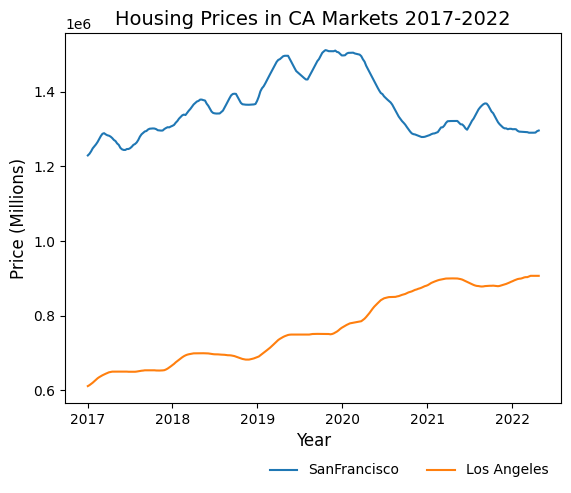

In [24]:
fig, ax = plt.subplots()

ax.plot(
    ca_housing_markets.index,
    ca_housing_markets["San Francisco"],
    label="SanFrancisco"
)
ax.plot(
    ca_housing_markets.index,
    ca_housing_markets["Los Angeles"],
    label="Los Angeles"
)

ax.set_title("Housing Prices in CA Markets 2017-2022", fontsize=14)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Price (Millions)", fontsize=12)
# ax.legend(loc="lower right") #center
ax.legend(bbox_to_anchor=(1,-.13), ncol=2, frameon=False)
plt.show()